# Transformación lineal
Una transformación lineal es una función que transforma un vector en otro (pasamos de un espacio vectorial V a uno W):}
$$ T:V \longrightarrow W$$

Una transformación lineal, se puede representar con una matriz, ya que si multiplicamos una matriz $A$ por un vector $v$, obtenemos un nuevo vector $w$:
$$Av = w$$ 
Decimos entonces que la matriz $A$ genera una transformación sobre el vector $v$

In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
A = np.array([[-1,3], [2,-2]])
A

array([[-1,  3],
       [ 2, -2]])

In [126]:
vector = np.array([[2],[1]])
vector

array([[2],
       [1]])

In [127]:
#corremos un archivo para utilizar su funcion
%run './funciones_aux/graficarvector.ipynb'

In [128]:
#devuelve al vector de forma horizontal
vector.flatten()

array([2, 1])

In [129]:
# devuelve a la matriz como un vector horizontal estirado
A.flatten()

array([-1,  3,  2, -2])

In [130]:
# aplicamos la transformación, para ello realizamos
# el producto Av
vector_transformado = A.dot(vector)

(-0.5, 2.5)

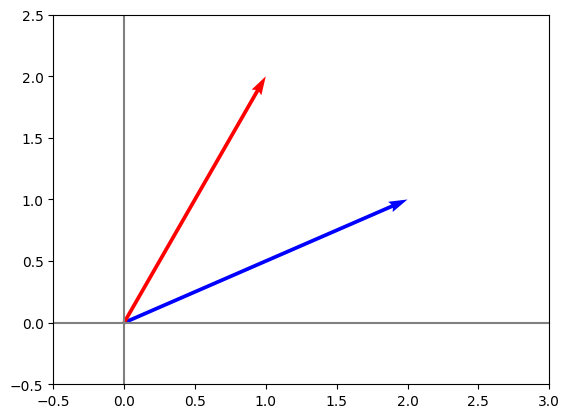

In [131]:
# utilizamos funcion del archivo que corrimos
graficarvector([vector.flatten(), vector_transformado.flatten()],
                cols = ['blue', 'red'])
plt.xlim(-0.5,3)
plt.ylim(-0.5,2.5)

In [132]:
# Calculamos el determinante de la matriz de transformacion
np.linalg.det(A)

-4.0

In [133]:
print(np.linalg.norm(vector))
print(np.linalg.norm(vector_transformado))

2.23606797749979
2.23606797749979


Observamos que la transformación anterior preservó la norma. Aunque el determinante es negativo

### Eigenvalores y eigenvectores
Cuando aplicamos una transformación $A$ sobre un vector $v$ y este no sufre un cambio en su forma mas que una homotecia (cambio de tamaño), se dice que el vector $v$ es un eigenvector. Es decir, satisface la siguiente ecuación:
$$Av = \lambda v$$
Donde $\lambda$ es un eigenvalor. 

In [134]:
# Vamos a definir 2 colores
orange_light = '#FF9A13'
blue_light = '#1190FF'

In [135]:
# Definimos una matriz
A = np.array([[3, 2], [4, 1]])
print(A)

# Definimos un vector 
v = np.array([[1], [1]])
print(v)

[[3 2]
 [4 1]]
[[1]
 [1]]


In [136]:
u = A.dot(v)
u

array([[5],
       [5]])

(-1.0, 6.0)

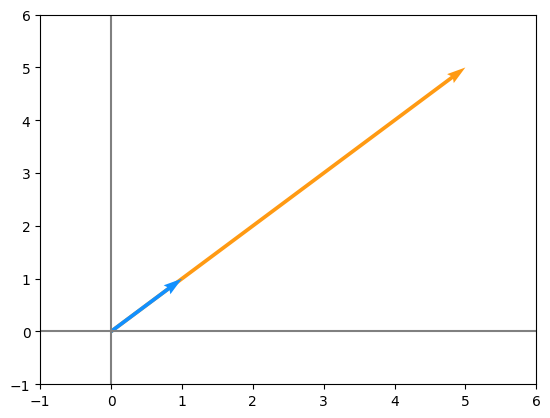

In [137]:
graficarvector([u.flatten(), v.flatten()], 
               cols = [orange_light,blue_light])


plt.xlim(-1, 6)
plt.ylim(-1, 6)

In [138]:
#autovalor o eigenvalor
lambda_1 = 5
lambda_1* v == u


array([[ True],
       [ True]])

In [139]:
#otro eigenvector 
s = np.array([[-1],[2]])
t = A.dot(s)
t

array([[ 1],
       [-2]])

(-3.0, 3.0)

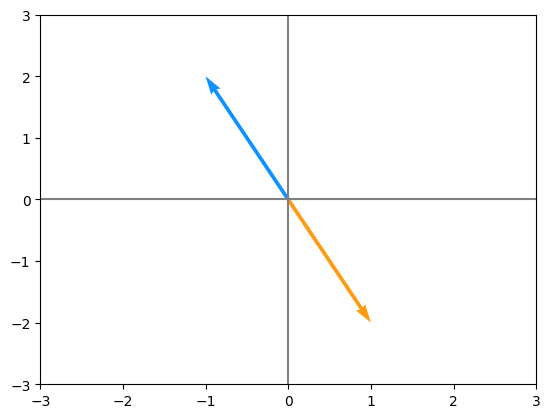

In [140]:
graficarvector([t.flatten(), s.flatten()], 
               cols = [orange_light,blue_light])


plt.xlim(-3, 3)
plt.ylim(-3, 3)

### ¿Cómo calcular los autovalores y autovectores?

In [141]:
# Definimos una matriz
A = np.array([[3, 2], [4, 1]])

In [142]:
# devuelve un array con los autovectores
# devuelve un array con los autovectores asociados
np.linalg.eig(A)

(array([ 5., -1.]),
 array([[ 0.70710678, -0.4472136 ],
        [ 0.70710678,  0.89442719]]))

In [143]:
autovalores, autovectores = np.linalg.eig(A)
autovalores

array([ 5., -1.])

In [144]:
autovectores[:,0]

array([0.70710678, 0.70710678])

In [145]:
autovectores[:,1]

array([-0.4472136 ,  0.89442719])

No se parecen a los autovectores que vimos anteriormente

In [146]:
v = np.array([[-1],[2]])
Av = A.dot(v)

v_np = autovectores[:,1]

(-4.0, 3.0)

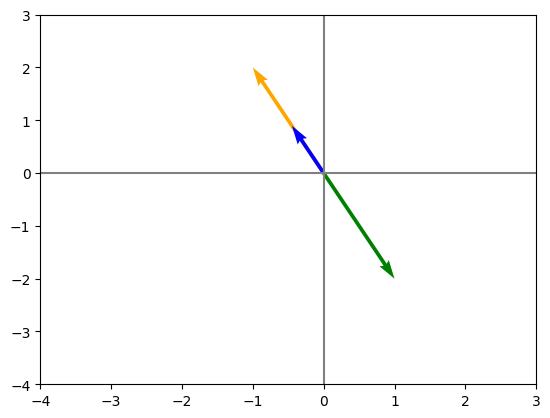

In [147]:
graficarvector([Av.flatten(), v.flatten(), v_np], 
               cols = ['green', 'orange', 'blue'])

plt.xlim(-4,3)
plt.ylim(-4,3)

Vemos que el vector $v=(-1,2)$ es múltiplo del eigenvector $[-0.447, 0.894]$. Se dice que, pese a que no coincidan en magnitud o sentido, coinciden en dirección por lo el vector $v$ también es eigenvector.

### Descomposición de matrices
Es encontrar dos matrices que me puedan ayudar a escribir mi matriz original y que tengan ciertas propiedades.
$$A = PDP^{-1}$$
Donde $A$ es mi matriz original, $P$ es una matriz creada por los autovectores (columnas) y $D$ es una matriz diagonal conformada por los eigenvalores.

In [148]:
# Definimos la misma matriz
A = np.array([[3, 2], [4, 1]])
A

array([[3, 2],
       [4, 1]])

In [149]:
autovalores, autovectores = np.linalg.eig(A)
print(autovalores, autovectores, sep = '\n')

[ 5. -1.]
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


In [150]:
# A = PDP^-1
A_calc = autovectores.dot(np.diag(autovalores)).dot(np.linalg.inv(autovectores))
A_calc

array([[3., 2.],
       [4., 1.]])

¿Qué pasa cuando A es simétrica? Es decir, $A^T = A$

In [151]:
# definimos otra matriz
A = np.array([[3,2], [2,3]])
A

array([[3, 2],
       [2, 3]])

In [152]:
# calculamos la transpuesta
A.T

array([[3, 2],
       [2, 3]])

In [153]:
# calculamos eigenvalores y eigenvectores
autovalores, autovectores = np.linalg.eig(A)
print(autovalores, autovectores, sep = '\n')

[5. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Una propiedad de la matriz de eigenvectores $P$ es que es ortogonal (sus vectores columna son ortonormales entre sí).

Al ser una matriz ortogonal, entonces $P^T = P^{-1} $ por lo que tenemos:
$$A = P D P^{-1} = PDP^{T}$$

Calcular una transpuesta es mucho más sencillo y computacionalmente económico que calcular una matriz inversa

In [154]:
A

array([[3, 2],
       [2, 3]])

In [155]:
A_calc = autovectores.dot(np.diag(autovalores)).dot(autovectores.T)
A_calc 


array([[3., 2.],
       [2., 3.]])

### Descomposición de una matriz NO cuadrada
Para matrices cuadradas se utilizan los eigenvalores y eigenvectores para su descomposición. Para matrices no cuadradas se utiliza la descomposición de valores singulares (SVD).

Sean $U,V,D$ matrices ortogonales. $D$ es además una matriz diagonal, con los valores singulares. $V$ tiene todos los vectores (columna) derechos singulares, mientras que $U$ tienen los vectores (columna) izquierdos singulares. Entonces, la matriz A se puede escribir: 
$$ A = UDV$$

In [156]:
# definimos la matriz a descomponer
A = np.array([[1,2,3], [3,4,5]])
A

array([[1, 2, 3],
       [3, 4, 5]])

In [157]:
U, D, V = np.linalg.svd(A)

In [158]:
# vecotes singulares izquierdos
U

array([[-0.46410668, -0.88577931],
       [-0.88577931,  0.46410668]])

In [159]:
print(D) # devuelve solo los valores de la diagonal por lo que hay que hacerla una matriz diagonal
col_extra = np.array([[0],[0]])
D = np.concatenate((np.diag(D), col_extra), axis = 1) #agregamos una columna extra de 0
print(D)

[7.97638869 0.61418515]
[[7.97638869 0.         0.        ]
 [0.         0.61418515 0.        ]]


In [160]:
np.array([[0],[0]])

array([[0],
       [0]])

In [ ]:
# vecotes singulares derechos
V

array([[-0.39133557, -0.5605708 , -0.72980603],
       [ 0.8247362 ,  0.13817999, -0.54837623],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [162]:
# A = UDV
A_calc = U.dot(D).dot(V)
A_calc

array([[1., 2., 3.],
       [3., 4., 5.]])

In [163]:
# recuperamos la matriz
A

array([[1, 2, 3],
       [3, 4, 5]])

### Las 3 transformaciones
Una matriz en realidad es una transformación. Al descomponer una matriz de la forma: 
$$A = PDP^{-1}$$
Obtenemos 3 matrices que también son transformaciones. ¿Cómo transforman un vector cada una de estas transformaciones?

Para contestar esto, lo visualizaremos sobre el circulo unitario, ya que será más fácil de ver los efectos:

In [164]:
%run './funciones_aux/graficarmatriz.ipynb'

In [165]:
A = np.array([[3,7], [5,2]])


Circulo unitario


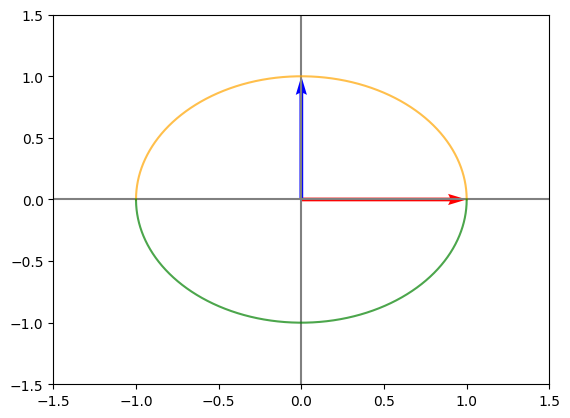

Circulo unitario transformado


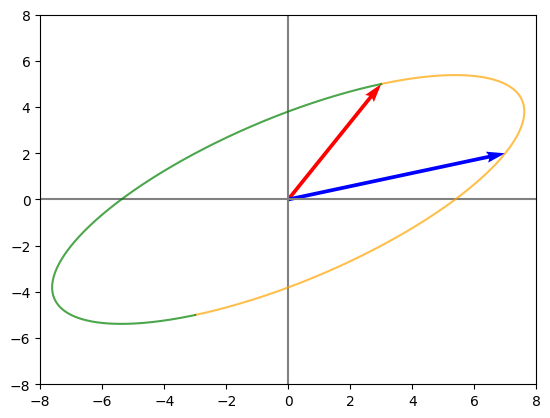

In [166]:
print('Circulo unitario')
graficarMatriz(np.eye(2))

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.show()

print('Circulo unitario transformado')
graficarMatriz(A)

plt.xlim(-8,8)
plt.ylim(-8,8)
plt.show()

In [167]:
U,D,V = np.linalg.svd(A)

Circulo unitario


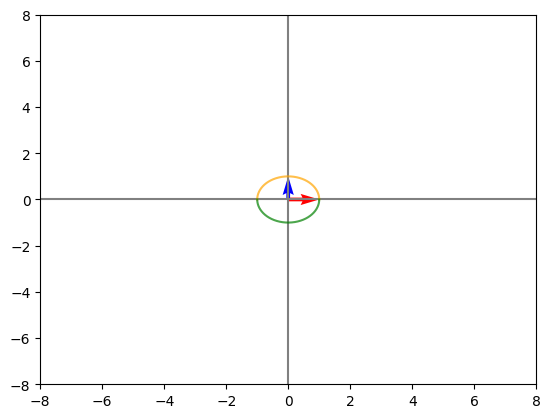

Rotación hecha por V


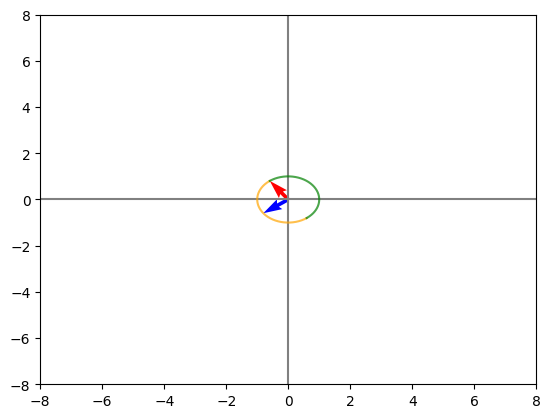

Escalamiento hecha por D


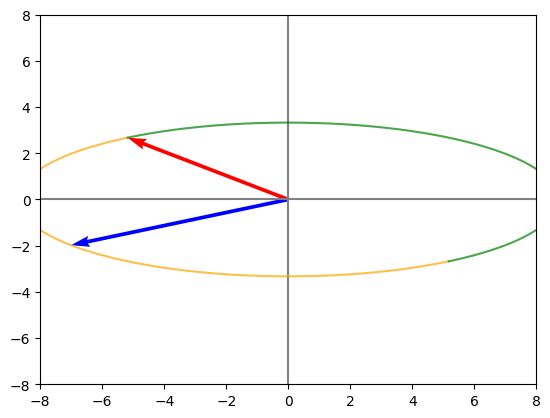

Segunda rotacion hecha por U


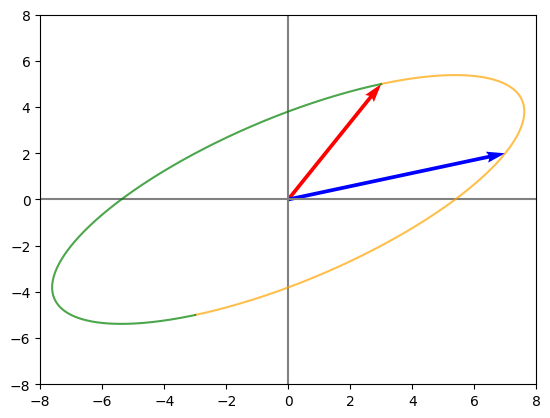

In [168]:
print('Circulo unitario')
graficarMatriz(np.eye(2))

plt.xlim(-8,8)
plt.ylim(-8,8)
plt.show()


print('Rotación hecha por V')
graficarMatriz(V)

plt.xlim(-8,8)
plt.ylim(-8,8)
plt.show()

print('Escalamiento hecha por D')
graficarMatriz(np.diag(D).dot(V))

plt.xlim(-8,8)
plt.ylim(-8,8)
plt.show()

print('Segunda rotacion hecha por U')
graficarMatriz(U.dot(np.diag(D)).dot(V))

plt.xlim(-8,8)
plt.ylim(-8,8)
plt.show()

### ¿Cómo interpretar los valores singulares?

In [169]:
# definimos la misma matriz
A = np.array([[3,7], [5,2]])
U,D,V = np.linalg.svd(A)
U

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

In [170]:
U

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

In [171]:
u1 = [D[0]* U[0,0], D[0]*U[0,1]]
v1 = [D[1]* U[1,0], D[1]*U[1,1]]

print([A[0,0], A[1,0]])
print(u1)
print()
print([A[0,1], A[1,1]])
print(v1)

[3, 5]
[-7.4120434792975685, -4.580894796297923]

[7, 2]
[-1.7497461132982814, 2.8311486829996433]


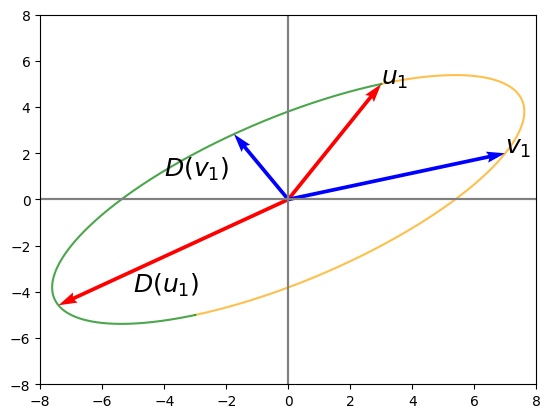

In [172]:
graficarMatriz(A)
graficarvector([u1,v1], cols = ['red', 'blue'])

plt.text(3,5, r"$u_1$", size = 18)
plt.text(7,2, r"$v_1$", size = 18)

plt.text(-5,-4, r"$D(u_1)$", size = 18)
plt.text(-4,1, r"$D(v_1)$", size = 18)

plt.xlim(-8,8)
plt.ylim(-8,8)
plt.show()